In [1]:
import pandas as pd
import datetime
import os
import pytz
utc = pytz.utc
AZtz = pytz.timezone("US/Arizona")

#import the diffrent data frames for each data stream

listofDataFiles = ["appleWatch6pillowSleepStages", "fitbitSleepStages", "ouraRingSleepStages", "withingsBedSleepStages", "amazonHaloSleepStages"]

deviceNames = ["apple watch", "fitbit", "oura", "withings", "halo"]

dfs = []

for fn in listofDataFiles:
    dfs.append(pd.read_parquet(fn + ".parquet.gzip"))



In [2]:
earliestDay = min([i.index[0].astimezone(AZtz) for i in dfs]).date()
latestDay = max([i.index[len(i)-1].astimezone(AZtz) for i in dfs]).date()

print(earliestDay)
print(latestDay)

daylist = [earliestDay]
i = 0
while daylist[i] != latestDay:
    i = i + 1
    daylist.append(earliestDay + datetime.timedelta(days=i))
    

print(len(daylist))



2020-05-13
2021-08-09
454


In [3]:
#for every day I want to collect a few nested lists
#[day,[oura,[[times],[values]]],halo[]]]
alldataList = []
for day in daylist:
    print(day)
    thisDaylist = []
    thisDaylist.append(day)
    allDeviceDat = []
    active = [0] * len(deviceNames)
    for devicei in range(len(deviceNames)):
        deviceDat = []
        deviceDat.append(deviceNames[devicei])
        atimel = []
        astagel = []
        for group in dfs[devicei].groupby(dfs[devicei].index.date):
            #print(group[1])
            if group[0] == day:
                #print(group)
                timel = [k.astimezone(AZtz) for k in group[1].index.to_list()]
                stagel = group[1]['stage'].to_list()
                etimel = [k.astimezone(AZtz) for k in group[1]['endTimestamp'].to_list()]

                #I want to zip together these lists
                for i in range(len(timel)):
                    atimel.append(timel[i])
                    atimel.append(etimel[i])
                    astagel.append(stagel[i])
                    astagel.append(stagel[i])
                active[devicei] = 1
                
        deviceDat.append(atimel)
        deviceDat.append(astagel)
        allDeviceDat.append(deviceDat)
    thisDaylist.append(allDeviceDat)
    thisDaylist.append(active)
    alldataList.append(thisDaylist)

#print(alldataList)


2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30
2020-05-31
2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30
2020-07-01
2020-07-02
2020-07-03
2020-07-04
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11
2020-07-12
2020-07-13
2020-07-14
2020-07-15
2020-07-16
2020-07-17
2020-07-18
2020-07-19
2020-07-20
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01
2020-08-02
2020-08-03
2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11

In [4]:
for i in alldataList[0]:
    print(i)
    print("****************")

2020-05-13
****************
[['apple watch', [], []], ['fitbit', [Timestamp('2020-05-13 13:43:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 13:45:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 13:45:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:41:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:41:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:42:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:42:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:43:00-0700', tz='US/Arizona')], [2, 2, 3, 3, 2, 2, 3, 3]], ['oura', [], []], ['withings', [], []], ['halo', [], []]]
****************
[0, 1, 0, 0, 0]
****************


In [5]:
#I want to see how many days there are wich devices
#[[day,data,active]] totalactivities = []
#i think i want a new data frame that i can add columns to one for graphable raw data and one for metadata both indexed by dates

datadfColumns = ['date'] + deviceNames
datadf = pd.DataFrame(columns = datadfColumns)
datadf.set_index('date',inplace=True)

for i in range(len(alldataList)):
    thisRow = alldataList[i]
    datadf.loc[thisRow[0]] = [[thisRow[1][j][1],thisRow[1][j][2]] for j in range(len(deviceNames))]
    #print(datadf.loc[thisRow[0]])



metadatadfColumns = ['date', 'deviceActivity']
metadatadf = pd.DataFrame(columns = metadatadfColumns)
metadatadf.set_index('date',inplace=True)

for i in range(len(alldataList)):
    thisRow = alldataList[i]
    #print(thisRow[0])
    #print(thisRow[2])
    metadatadf.loc[thisRow[0]] = [thisRow[2]]

totalActivity = [sum(x) for x in metadatadf.iloc[:]['deviceActivity']]

metadatadf['totalActivity'] = totalActivity

In [6]:
#calculate total activity column and add to the df
print(metadatadf.sort_values(by=['totalActivity'], ascending=False).head(2))

             deviceActivity  totalActivity
date                                      
2021-08-09  [1, 1, 1, 1, 1]              5
2021-08-08  [1, 1, 1, 1, 1]              5


In [7]:
print(totalActivity.count(5))
print(totalActivity.count(4))
print(totalActivity.count(3))
print(totalActivity.count(2))
print(totalActivity.count(1))

3
34
204
58
155


In [8]:
for devicei in range(len(deviceNames)):
    print(deviceNames[devicei])
    print(sum([x[devicei] for x in metadatadf.iloc[:]['deviceActivity']]))

apple watch
17
fitbit
453
oura
289
withings
112
halo
163


In [9]:
#let's see what those 36 days where we have 4 or more sleep ata streams look like
daysDev4pmetaDF = metadatadf.sort_values(by=['totalActivity'], ascending=False).head(36).sort_index(ascending=False)
#print(daysDev4pmetaDF)
fourPlusDeviceDays = daysDev4pmetaDF.index.to_list()


daysDev3pmetaDF = metadatadf.sort_values(by=['totalActivity'], ascending=False).head(239).sort_index(ascending=False)

threePlusDeviceDays = daysDev3pmetaDF.index.to_list()

[Timestamp('2021-07-29 00:00:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:07:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:22:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:22:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:31:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:31:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:36:30-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:36:30-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:42:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:42:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:58:30-0700', tz='US/Arizona'), Timestamp('2021-07-29 22:58:30-0700', tz='US/Arizona'), Timestamp('2021-07-29 23:20:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 23:20:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 23:30:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 23:30:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 23:34:00-0700', tz='US/Arizona'), Timestamp('2021-07-29 23:34:00-0700', tz='US/Ar

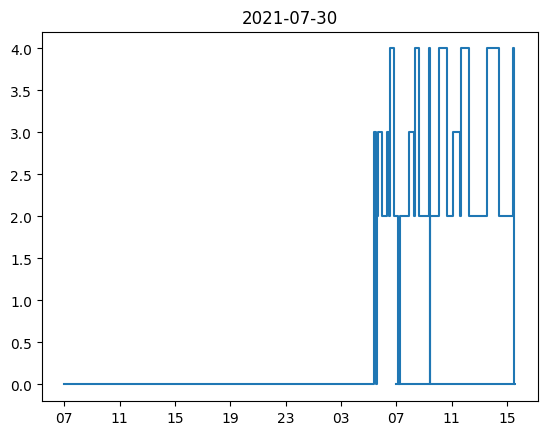

In [10]:
import matplotlib.pyplot as plt
import matplotlib

testDayi = 8

#title the name of the day
plt.title(fourPlusDeviceDays[testDayi])

startDatetime = datetime.datetime.combine(fourPlusDeviceDays[testDayi], datetime.datetime.min.time())
startTimestamp = datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0][0] - datetime.timedelta(hours=datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0][0].hour, minutes=datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0][0].minute)
testTimeList = [startTimestamp] + datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0] + [startTimestamp + datetime.timedelta(hours=23,minutes=59)]

testValueList = [0] + datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][1] + [0]

print(testTimeList)
print(testValueList)

plt.plot(testTimeList,testValueList)
#plt.plot(bottomX,invizY)
#plt.gcf().autofmt_xdate()
ax=plt.gca()
xfmt = matplotlib.dates.DateFormatter('%H')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date("US/Arizona")

plt.show()

In [11]:
theDate = fourPlusDeviceDays[2]
timestampsabc = datadf.loc[theDate]['fitbit'][0]
dataabc = datadf.loc[theDate]['fitbit'][1]

print(theDate)
print(timestampsabc)

2021-08-07
[Timestamp('2021-08-07 02:39:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 02:40:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 02:40:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:00:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:00:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:22:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:22:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:31:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:31:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:37:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:37:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:41:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:41:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:48:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:48:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:03:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:03:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:25:00-0700'

In [12]:
def d2dt(d,targetTimezone):
    return pytz.timezone(targetTimezone).localize(datetime.datetime.combine(d, datetime.datetime.min.time()))

In [13]:
fourPlusDeviceDays

[datetime.date(2021, 8, 9),
 datetime.date(2021, 8, 8),
 datetime.date(2021, 8, 7),
 datetime.date(2021, 8, 6),
 datetime.date(2021, 8, 5),
 datetime.date(2021, 8, 4),
 datetime.date(2021, 8, 2),
 datetime.date(2021, 8, 1),
 datetime.date(2021, 7, 30),
 datetime.date(2021, 7, 29),
 datetime.date(2021, 7, 27),
 datetime.date(2021, 7, 25),
 datetime.date(2021, 7, 22),
 datetime.date(2021, 7, 21),
 datetime.date(2021, 7, 20),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 6, 29),
 datetime.date(2021, 6, 28),
 datetime.date(2021, 6, 27),
 datetime.date(2021, 6, 26),
 datetime.date(2021, 6, 18),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 13),
 datetime.date(2021, 6, 12),
 datetime.date(2021, 6, 11),
 datetime.date(2021, 6, 10),
 datetime.date(2021, 6, 9),
 datetime.date(2021, 6, 8),
 datetime.date(2021, 6, 7),
 datetime.date(2021, 6, 6),
 datetime.date(2021, 6, 5),
 datetime.date(2021, 6, 3),

In [14]:
datadf["fitbit"][0]

[[Timestamp('2020-05-13 13:43:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 13:45:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 13:45:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 14:41:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 14:41:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 14:42:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 14:42:00-0700', tz='US/Arizona'),
  Timestamp('2020-05-13 14:43:00-0700', tz='US/Arizona')],
 [2, 2, 3, 3, 2, 2, 3, 3]]

In [15]:
datadf["fitbit"]

date
2020-05-13    [[2020-05-13 13:43:00-07:00, 2020-05-13 13:45:...
2020-05-14    [[2020-05-14 01:21:00-07:00, 2020-05-14 01:32:...
2020-05-15    [[2020-05-14 18:10:00-07:00, 2020-05-14 18:12:...
2020-05-16    [[2020-05-16 01:55:00-07:00, 2020-05-16 02:22:...
2020-05-17    [[2020-05-17 00:47:30-07:00, 2020-05-17 00:58:...
                                    ...                        
2021-08-05    [[2021-08-05 00:20:30-07:00, 2021-08-05 00:33:...
2021-08-06    [[2021-08-05 18:36:30-07:00, 2021-08-05 18:37:...
2021-08-07    [[2021-08-07 02:39:30-07:00, 2021-08-07 02:40:...
2021-08-08    [[2021-08-08 01:17:00-07:00, 2021-08-08 01:19:...
2021-08-09    [[2021-08-09 01:51:00-07:00, 2021-08-09 02:11:...
Name: fitbit, Length: 454, dtype: object

In [46]:
[x for x in enumerate(datadf.loc[theDate]["halo"][0])]


[(0, Timestamp('2021-08-08 02:39:57-0700', tz='US/Arizona')),
 (1, Timestamp('2021-08-08 02:47:27-0700', tz='US/Arizona')),
 (2, Timestamp('2021-08-08 02:47:27-0700', tz='US/Arizona')),
 (3, Timestamp('2021-08-08 02:58:27-0700', tz='US/Arizona')),
 (4, Timestamp('2021-08-08 02:58:27-0700', tz='US/Arizona')),
 (5, Timestamp('2021-08-08 02:59:27-0700', tz='US/Arizona')),
 (6, Timestamp('2021-08-08 02:59:27-0700', tz='US/Arizona')),
 (7, Timestamp('2021-08-08 02:59:57-0700', tz='US/Arizona')),
 (8, Timestamp('2021-08-08 02:59:57-0700', tz='US/Arizona')),
 (9, Timestamp('2021-08-08 03:01:57-0700', tz='US/Arizona')),
 (10, Timestamp('2021-08-08 03:01:57-0700', tz='US/Arizona')),
 (11, Timestamp('2021-08-08 03:10:57-0700', tz='US/Arizona')),
 (12, Timestamp('2021-08-08 03:10:57-0700', tz='US/Arizona')),
 (13, Timestamp('2021-08-08 03:11:27-0700', tz='US/Arizona')),
 (14, Timestamp('2021-08-08 03:11:27-0700', tz='US/Arizona')),
 (15, Timestamp('2021-08-08 03:14:27-0700', tz='US/Arizona')),
 (

In [24]:
[x for x in enumerate(datadf.loc[theDate]["oura"][1])]


[(0, 2),
 (1, 2),
 (2, 0),
 (3, 0),
 (4, 2),
 (5, 2),
 (6, 3),
 (7, 3),
 (8, 2),
 (9, 2),
 (10, 0),
 (11, 0),
 (12, 2),
 (13, 2),
 (14, 3),
 (15, 3),
 (16, 2),
 (17, 2),
 (18, 3),
 (19, 3),
 (20, 2),
 (21, 2),
 (22, 4),
 (23, 4),
 (24, 2),
 (25, 2),
 (26, 0),
 (27, 0),
 (28, 2),
 (29, 2),
 (30, 0),
 (31, 0),
 (32, 3),
 (33, 3),
 (34, 2),
 (35, 2),
 (36, 0),
 (37, 0),
 (38, 2),
 (39, 2),
 (40, 3),
 (41, 3),
 (42, 2),
 (43, 2),
 (44, 3),
 (45, 3),
 (46, 2),
 (47, 2),
 (48, 4),
 (49, 4),
 (50, 2),
 (51, 2),
 (52, 4),
 (53, 4),
 (54, 2),
 (55, 2),
 (56, 0),
 (57, 0),
 (58, 2),
 (59, 2),
 (60, 4),
 (61, 4),
 (62, 2),
 (63, 2),
 (64, 4),
 (65, 4),
 (66, 0),
 (67, 0),
 (68, 2),
 (69, 2)]

In [18]:
times = datadf.loc[theDate]["oura"][0]
stages = datadf.loc[theDate]["oura"][1]
l = sorted([[x[0], x[1]] for x in zip(times, stages)], key=lambda x:x[0])
times = [x[0] for x in l]
stages = [x[1] for x in l]

[datetime.datetime(2021, 8, 8, 0, 0, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), Timestamp('2021-08-08 02:25:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:25:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:30:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:30:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:40:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:40:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:55:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 02:55:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:00:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:00:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:10:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:10:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:20:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:20:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:30:39-0700', tz='US/Arizona'), Timestamp('2021-08-08 03:30:39-0700', tz='US/Arizona'), Timestamp

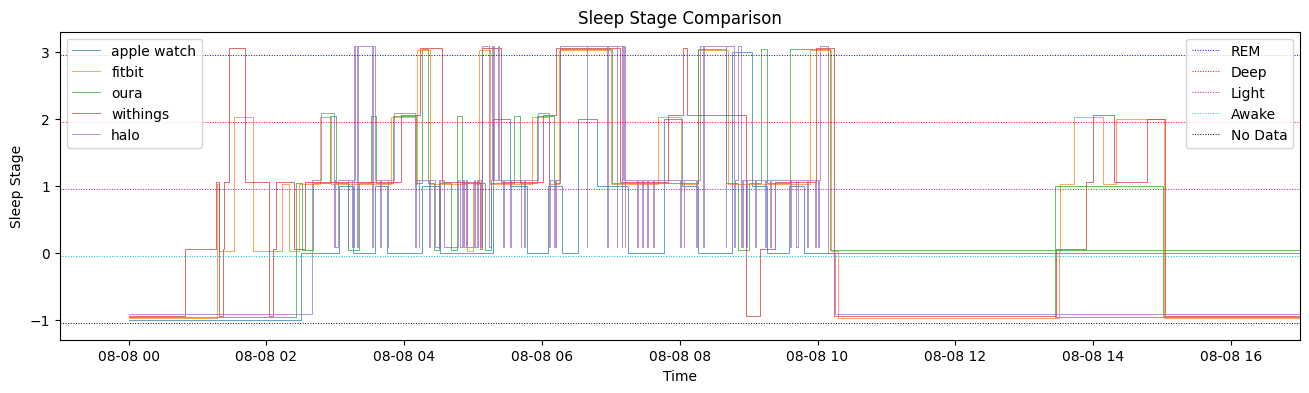

In [66]:
import matplotlib.pyplot as plt
import matplotlib
theDate = fourPlusDeviceDays[1]

#the datadf is indexed by day
#contains columns that are each device
#each cell contains a list of two lists
 # the first one is a list of timestamps of any transitions observed
 # the second one is the sleep stage transitioned to at that time


fig, ax = plt.subplots(figsize=(16.0, 4.0))

#needs theDate
#a list of timestamps
#a list of sleep stages

plt.gca().set_title("Sleep Stage Comparison")

plt.gca().set_ylim([-1.3,3.3])

plt.gca().set_xlim([d2dt(theDate, 'US/Arizona') - + datetime.timedelta(hours=1), d2dt(theDate, 'US/Arizona') + datetime.timedelta(hours=17)])
#plt.gca().xaxis_date('US/Arizona')
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))


legend1 = []
for i in range(len(deviceNames)):
    do = .02 * i # device offset
    og_times = datadf.loc[theDate][deviceNames[i]][0]
    og_stages = datadf.loc[theDate][deviceNames[i]][1]

    
    raw_times = og_times
    raw_stages = []
    for s in og_stages:
        if s > 0:
           raw_stages.append(s-1) 
        else:
            raw_stages.append(s) 

    #this hacks around the a weird oura datapoint on day index 1
    if i ==2:
        raw_times[67] = raw_times[67] + datetime.timedelta(hours=6, minutes=20)
    

    
    times = []
    stages = []
    # start at midnight
    midnight = d2dt(theDate, 'US/Arizona')
    # if no data create a new pair between midnight and the start
    if raw_times[0] > midnight:
        times.extend([midnight,raw_times[0]])
        stages.extend([-1 + do,-1 + do])
    
    #check the diff between index 1 and 2, then 3 and 4, etc
    for j in range(1,len(raw_times)-1,2):
        times.extend([raw_times[j-1], raw_times[j]])
        stages.extend([raw_stages[j-1] + do, raw_stages[j] + do])
        # if there is a difference then insert a pair of timestamps
            # insert the filler with a -1 * device offset
        if not raw_times[j] == raw_times[j+1]:
            times.extend([raw_times[j], raw_times[j+1]])
            stages.extend([-1 + do,-1 + do])

    times.extend([raw_times[-2], raw_times[-1]])
    stages.extend([raw_stages[-2], raw_stages[-1]])
    #check if the end is midnight
        #if not add a filler
    if raw_times[-1] < midnight + datetime.timedelta(days=1):
        times.extend([raw_times[-1], midnight + datetime.timedelta(days=1)])
        stages.extend([-1 + do,-1 + do])

    #print(deviceNames[i] + "\t" + str(len(datadf.loc[theDate][deviceNames[i]][0])))
    #print(times)
    #print(stages)
    if i ==2:
        print(times)
    plotToAdd, = ax.plot(times, stages, label =deviceNames[i], alpha=0.7, linewidth=.7)
    legend1.append(plotToAdd)

legend2 = [
    ax.axhline(y = -1 - 0.05, color = 'k', linestyle = ':', linewidth=.7, label = "No Data"),
    ax.axhline(y = 0 - 0.05, color = 'c', linestyle = ':', linewidth=.7, label = "Awake"),
    ax.axhline(y = 1 - 0.05, color = 'm', linestyle = ':', linewidth=.7, label = "Light"),
    ax.axhline(y = 2 - 0.05, color = 'r', linestyle = ':', linewidth=.7, label = "Deep"),
    ax.axhline(y = 3 - 0.05, color = 'b', linestyle = ':', linewidth=.7, label = "REM") 
]

legendToAdd = ax.legend(loc="upper left", handles=legend1)
plt.legend(loc="upper right", handles=legend2[::-1])

ax.add_artist(legendToAdd)
plt.ylabel("Sleep Stage")
plt.xlabel("Time")
plt.show()

# add in no data values as -1
# make lines thinner
#crop ends
#make title better
#offset each device for visability

#add sleep stage labels with horzontal lines
#make x labels better
#make y labels better

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

#make a generic graphing function where you can pass in a day and it'll graph all the devices
def graphSleepData(day, ddf):
    #set up plot
    plt.title(day)

    for devicei in range(len(deviceNames)):
        #add this line to the plot and legend
        #insted of times they will be indicies to change to the value
        timelist = ddf.loc[day][deviceNames[devicei]][0]
        valueslist = ddf.loc[day][deviceNames[devicei]][1]
    plt.show()



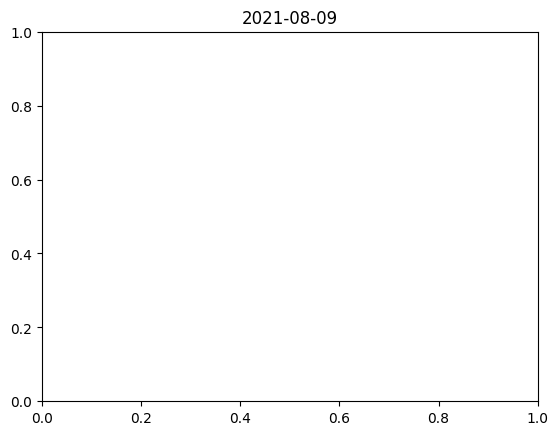

In [21]:
graphSleepData(fourPlusDeviceDays[0], datadf)

#round every timestamp to the minute and convert to an integer for graphing

In [22]:
#I have the data in the form of start and end times and sleep level


#I'll make noon to noon graphs
#the height of the graphs will be the sleep stage and color and opacity can be the diffrent streams

#i'll want to get an idea of what days have the most overalpping data
#i'll make a list of dates that I am interested in
#for each day in that list I'll add the name of any of the datastreams that 

#for every day
    #make an empty list
    #for every dataframe
        #make an empty lits
        #append all of the sleep stages for that df for that day
        #append to the list for that day

#start exploring how many days have overlapping data
#see what kind of subsets of data can be used to 
